In [52]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [53]:
dataset = load_wine()

In [54]:
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [55]:
data = dataset.data
target = dataset.target

In [56]:
data.shape

(178, 13)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)

In [58]:
mlp1 = MLPClassifier(hidden_layer_sizes=(100, 5), activation='logistic', max_iter=400)
mlp1.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 5), max_iter=400)

In [59]:
Y_pred = mlp1.predict(X_test)


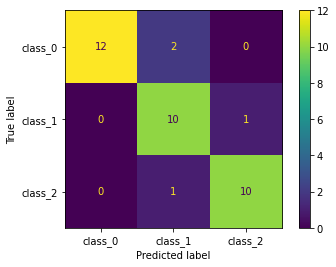

In [60]:
classes = dataset.target_names
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [61]:
print("Classification report before PCA")
print("================================")
print(classification_report(Y_test, Y_pred))

Classification report before PCA
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.77      0.91      0.83        11
           2       0.91      0.91      0.91        11

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



In [62]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(data)

In [63]:
X_pca.shape

(178, 5)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, target, test_size=0.2)

In [65]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 5), activation='logistic', max_iter=400)
mlp2.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 5), max_iter=400)

In [66]:
Y_pred = mlp2.predict(X_test)

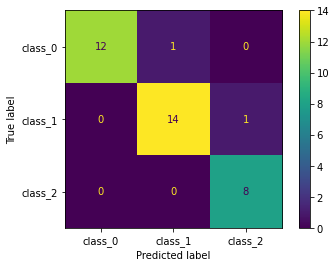

In [67]:
classes = dataset.target_names
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [68]:
print("Classification report after PCA")
print("================================")
print(classification_report(Y_test, Y_pred))

Classification report after PCA
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      0.93      0.93        15
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

